## Contrast estimations 

These estimations are based on: 

#### Möller et al. IUCrJ 6, 794-803 (2019)

http://journals.iucr.org/m/issues/2019/05/00/tj5024/

In [2]:
import os, sys
import numpy as np
from scipy import interpolate
import scipy.integrate as integrate
import matplotlib.pyplot as plt

In [3]:
# decay of contrast due to lower resolution; equation 13 from the paper
def beta_res(a,L,E,P):
    lam = wavelength(E)
    kappa = 2*np.pi*P*a/(lam*L)
    fun = lambda v: 2/kappa**2*(kappa-v)*(np.sin(v/2)/(v/2))**2
    outp = integrate.quad(fun,0,kappa)
        
    return np.array(outp[0]**2)

# decay of contrast due to limited coherence lengths; equation 14 from the paper
def beta_q(a,d,delLamLam,q,R,sigmah,E):
    
    # compare focus size to coherence lenght
    k = wavevector(E)
    cl = coherence_lenght(R, sigmah, E)
    if a > cl:
        etah = cl
    else:
        etah = a
    
    # integrals
    outp = []
    f = lambda x, z: (a-x)*(d-z)*(np.exp(-x**2/etah**2-2*np.absolute(delLamLam*q*np.sqrt(1-0.25*(q/k)**2)*x-delLamLam/2*q**2*z/k))+np.exp(-x**2/etah**2-2*np.absolute(delLamLam*q*np.sqrt(1-0.25*(q/k)**2)*x+delLamLam/2*q**2*z/k)))
    beta = integrate.dblquad(f, 0, d, lambda x: 0, lambda z: a)
    outp.append(2*beta[0]/(d*a)**2)
    return outp

def speckle_contrast(a, L, E, P, delLamLam, q, R, sigmah,d):
    beta = beta_res(a,L,E,P)*beta_q(a,d,delLamLam,q,R,sigmah,E)
    return beta

def wavelength(E):
    lam = 1.24/E*1e-9
    return lam

def wavevector(E):
    lam = wavelength(E)
    k = 2.*np.pi/lam
    return k

def coherence_lenght(R, sigmah, E):
    lam = wavelength(E)
    return 1./(2.)*R/sigmah*lam


### parameters

In [7]:
# constants
hbarc     = 3.2e-26  # J*m
delLamLam = 2e-4     # Delta E over E: pink: 1e-3, Si(111) = 1.4e-4, Si(311) = 3e-5
R         = 90       # source distance in m from equation 15
sigmah    = 36e-6    # rms source size in m (estimation is 11x30 um)
P         = 75e-6    # pixel size in m

# variables
a         = 25e-6    # beam focus size in m
d         = 1.3e-3   # sample thickness in m
E         = 12.5     # Energy in keV
L         = 10       # sample-detector-distance in m

### plot as a function of Q

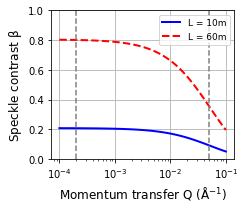

In [61]:
q_ = np.logspace(-4,-1,100)*1e10
b_ = np.zeros(q_.shape)
for i in range(len(b_)):
    b_[i] = speckle_contrast(a, L, E, P, delLamLam, q_[i], R, sigmah,d)
    
L2 = 60
for i in range(len(b_)):
    b_2[i] = speckle_contrast(a, L2, E, P, delLamLam, q_[i], R, sigmah,d)

plt.figure(figsize=[3.5,3])
plt.plot(q_*1e-10,b_,'-',lw=2, c= 'blue',label = 'L = 10m')
plt.plot(q_*1e-10,b_2,'-',lw=2, c= 'red',label = 'L = 60m',ls='--')
plt.xscale('log')
plt.axvline(x=2e-4,ls='--',c='gray')
plt.axvline(x=5e-2,ls='--',c='gray')
plt.xlabel(r'Momentum transfer Q $(\rm \AA^{-1})$',size=12)
plt.ylabel(r'Speckle contrast $\rm \beta$',size=12)
plt.legend(frameon=True,prop={'size': 9},loc='upper right')
plt.ylim(0,1)
plt.grid()
plt.tight_layout()
plt.savefig('/Users/fivos/Desktop/fig1.png',dpi=300)
plt.show()

### plot as a function of L

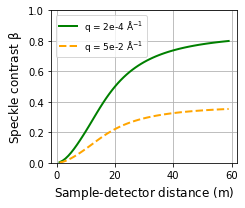

In [62]:
L_ = np.arange(1,60)
b_3 = np.zeros(L_.shape)
q = 2e-4*1e10
for i in range(len(L_)):
    b_3[i] = speckle_contrast(a, L_[i], E, P, delLamLam, q, R, sigmah,d)

L_ = np.arange(1,60)
b_4 = np.zeros(L_.shape)
q = 5e-2*1e10
for i in range(len(L_)):
    b_4[i] = speckle_contrast(a, L_[i], E, P, delLamLam, q, R, sigmah,d)
    
plt.figure(figsize=[3.5,3])
plt.plot(L_,b_3,'-',lw=2, c= 'green',label=r'q = 2e-4 $\rm \AA^{-1}$')
plt.plot(L_,b_4,'--',lw=2, c= 'orange',label=r'q = 5e-2 $\rm \AA^{-1}$')
plt.xlabel(r'Sample-detector distance $(\rm m)$',size=12)
plt.ylabel(r'Speckle contrast $\rm \beta$',size=12)
plt.legend(frameon=True,prop={'size': 9},loc='upper left')
plt.ylim(0,1)
plt.grid()
plt.tight_layout()
plt.savefig('/Users/fivos/Desktop/fig2.png',dpi=300)
plt.show()
